In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import os
import glob
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load and save functions
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name , 'rb') as f:
        return pd.DataFrame(pickle.load(f))

In [14]:
# load all spectra in internal memory 
locationSpectra = 'spectra_matched_multiproc/'
filenames = glob.glob(locationSpectra+'*pkl')

cut_off = 5000

X = np.zeros((len(filenames),cut_off))
wavelength = np.zeros((len(filenames),cut_off))
X_scaled = np.zeros((len(filenames),cut_off,1))
y = []

sc = MinMaxScaler()
counter_excluded = 0
for i in range(len(filenames)):
    df_current = load_obj(filenames[i])
    l = len(df_current['flux'])
    X[i][0:l] = df_current['flux'][0:l]
    wavelength[i][0:l] = np.power(10,df_current['loglam'][0:l])
    
    # Scale result in new array
    X_scaled[i] = sc.fit_transform(X[i].reshape(cut_off,1))
    
    y.append(df_current['information'].iloc[0])
    
X = X[0:(len(X)-counter_excluded)]
wavelength = wavelength[0:(len(X)-counter_excluded)]
y = np.array(y)

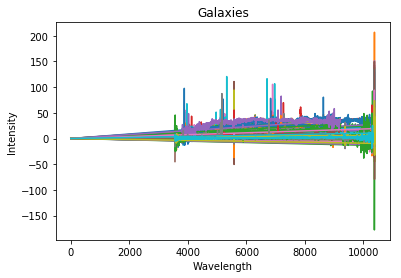

In [16]:
# plot galaxies
idx_galaxy = (y == 'GALAXY')
X_galaxy = X[idx_galaxy]
wavelength = wavelength[idx_galaxy]

fig = plt.figure()
for i in range(len(X_galaxy)):
    plt.plot(wavelength[i],X_galaxy[i])
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Galaxies')
plt.savefig('spec_plots/scaled/galaxies_flux.png')
plt.show()

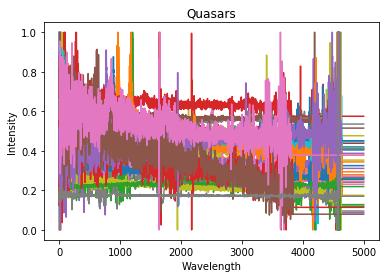

In [6]:
# plot quasars
idx_qso = (y == 'QSO   ')
X_qso = X_scaled[idx_qso]

fig = plt.figure()
for elem in X_qso:
    plt.plot(elem)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Quasars')
plt.savefig('spec_plots/scaled/quasars_flux.png')
plt.show()

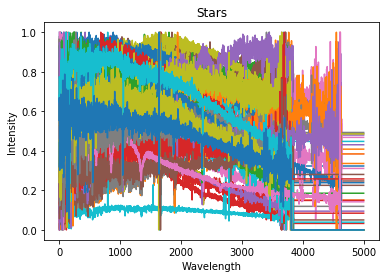

In [7]:
# plot stars
idx_stars = (y == 'STAR  ')
X_stars = X_scaled[idx_stars]

fig = plt.figure()
for elem in X_stars:
    plt.plot(elem)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Stars')
plt.savefig('spec_plots/scaled/stars_flux.png')
plt.show()

In [19]:
for i in range(len(filenames)):
    df_current = load_obj(filenames[i])
    for i in range(7):
        print(df_current['information'].iloc[i])
    print('\n\n')

GALAXY
                     
0.28252375
3.9893806e-05
0
1237667113870819925
BOSS



GALAXY
                     
0.3575521
8.592177e-05
0
1237658492809642460
BOSS



GALAXY
                     
0.16115779
3.0603816e-05
0
1237655504571924939
SDSS



GALAXY
                     
0.49571332
0.00013450994
0
1237658300058763614
BOSS



GALAXY
                     
0.13641323
2.2277061e-05
0
1237663547440890110
BOSS



GALAXY
STARBURST            
0.19500192
1.5149771e-05
0
1237664818750685521
BOSS



GALAXY
STARFORMING          
0.0505021
9.386436e-06
0
1237667429571100775
SDSS



STAR  
A0                   
0.00024322585
2.1105023e-05
0
1237660584445739182
SDSS



GALAXY
                     
0.813081
5.5179455e-05
0
1237659120933011696
BOSS



STAR  
M3                   
3.189206e-05
1.4059634e-05
0
1237660635464007832
SDSS



STAR  
K1                   
9.0945774e-05
7.864273e-06
0
1237660936628338810
SDSS



GALAXY
                     
0.49354488
0.000119423355
0
123767096537881042

GALAXY
                     
0.52219605
0.00016971817
0
1237662264860148651
BOSS



QSO   
AGN BROADLINE        
0.5609935
4.61752e-05
0
1237655108379476469
BOSS



GALAXY
                     
0.5529273
0.00019904553
0
1237661126144164846
BOSS



GALAXY
                     
0.49638084
0.00016924823
0
1237670014582522590
BOSS



GALAXY
                     
0.5330341
0.0001668616
0
1237664852040745758
BOSS



STAR  
K5                   
0.00014340314
1.1442629e-05
0
1237674284857361296
SDSS



STAR  
OB                   
5.2450658e-05
4.510757e-05
0
1237664093973053624
SDSS



GALAXY
                     
0.08829159
2.9325503e-05
0
1237661977088295031
SDSS



GALAXY
                     
0.5991009
0.00024909357
0
1237667430642156278
BOSS



STAR  
A0                   
-0.00016127493
5.3141794e-06
16
1237668731995750765
SDSS



QSO   
                     
1.6589696
0.00066898053
0
1237671124839039295
BOSS



GALAXY
                     
0.13956696
3.2527707e-05
0
123766833310505395

STAR  
M2                   
3.3893175e-05
6.469249e-05
0
1237661850935361977
SDSS



GALAXY
                     
0.6442559
0.00027164386
0
1237664131555918636
BOSS



GALAXY
                     
0.15675856
3.6529957e-05
0
1237667229295509549
BOSS



GALAXY
                     
0.41983807
0.000103790706
0
1237651192434197067
BOSS



QSO   
BROADLINE            
3.7324677
0.00030148044
0
1237648721781588768
BOSS



GALAXY
STARFORMING          
0.07822559
1.04018145e-05
0
1237666339727016131
SDSS



QSO   
BROADLINE            
1.6258521
0.00083982793
0
1237651753461940365
SDSS



QSO   
                     
0.44048074
6.187642e-05
0
1237673706655908328
BOSS



QSO   
BROADLINE            
1.2958461
0.00044094006
0
1237661850943291598
SDSS



QSO   
BROADLINE            
2.0077257
0.0009770322
0
1237662198289138262
SDSS



STAR  
WDhotter             
-5.7145917e-05
2.9921564e-05
0
1237662698102063137
BOSS



QSO   
BROADLINE            
2.6525168
0.00033214944
0
1237651272435564979


In [21]:
list(range(6))

[0, 1, 2, 3, 4, 5]